# Data Analysis in Python

## Pandas

Pandas is a python module for data handling and analysis, with it's explicit aim to handle missing data in an elegant way. 

In the following example, we read a `.csv` file into a data frame. We can see that missing data are represented as `NaN` values. 

In [67]:
import pandas as pd

# Data containing characteristics of various electronic dance music genres
df = pd.read_csv("edm_songs.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,title
0,0.806,0.950,7,-6.782,1,0.0811,0.000957,0.920,0.1130,0.580,127.997,197499,4,techhouse,Dirtybird Players
1,0.803,0.697,6,-9.479,1,0.0599,0.000130,0.888,0.3560,0.350,126.008,507998,4,techhouse,Tech House Movement
2,0.729,0.978,10,-6.645,1,0.0420,0.062300,0.908,0.0353,0.778,124.994,206000,4,techhouse,tech house
3,0.724,0.792,4,-8.555,0,0.0405,0.019100,0.812,0.1080,0.346,124.006,199839,4,techhouse,Tech House Bangerz
4,0.700,0.898,8,-6.099,1,0.2570,0.053000,0.418,0.5740,0.791,125.031,173861,4,techhouse,tech house


Once data is in a data frame format, quick analyses can be performed.

In [68]:
df.mean()

danceability             0.602479
energy                   0.871618
key                      5.600952
loudness                -5.869761
mode                     0.514667
speechiness              0.093811
acousticness             0.022772
instrumentalness         0.497083
liveness                 0.233391
valence                  0.294767
tempo                  143.431358
duration_ms         309236.525095
time_signature           3.976714
dtype: float64

In [69]:
df.std()

danceability             0.144944
energy                   0.116026
key                      3.623975
loudness                 2.862706
mode                     0.499797
speechiness              0.091243
acousticness             0.062071
instrumentalness         0.372952
liveness                 0.195299
valence                  0.215407
tempo                   15.669134
duration_ms         105583.387028
time_signature           0.192434
dtype: float64

In [86]:
df.genre.unique()

array(['techhouse', 'techno', 'trance', 'psytrance', 'trap', 'dnb',
       'hardstyle'], dtype=object)

In [71]:
# See the average value of each feature for a specific class
df.groupby('genre').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
dnb,0.520877,0.873539,5.614000,-4.065679,0.447000,0.083955,0.020010,0.459334,0.203153,0.253628,173.843173,286489.339667,3.998333
hardstyle,0.478675,0.896620,5.691333,-4.328503,0.363000,0.096933,0.041238,0.136239,0.273899,0.267960,150.808505,228970.819667,3.963667
psytrance,0.616325,0.902170,5.984000,-6.709473,0.598000,0.060667,0.006569,0.765212,0.292965,0.259317,142.835830,445592.912333,3.961667
techhouse,0.786642,0.833436,5.800333,-7.065800,0.566000,0.072241,0.014439,0.580296,0.141252,0.567592,124.924629,291912.381667,3.993333
techno,0.714229,0.797653,5.699667,-9.277120,0.582000,0.066108,0.039427,0.846473,0.149674,0.193564,129.213673,398903.237000,3.946000
trance,0.507682,0.892384,5.391333,-6.907811,0.443000,0.071296,0.012967,0.495438,0.296911,0.220306,134.630759,287504.880667,3.986000
trap,0.592924,0.905522,5.026000,-2.733938,0.603667,0.205480,0.024753,0.196592,0.275886,0.301005,147.762937,225282.104667,3.988000


## Querying Data

### Columns
Columns can be selected from a data frame using the syntax `df.col_name` or `df["col_name"]`. To select multiple columns, `df[["col1", "col2"]]`. 

In [72]:
df[["genre", "instrumentalness"]]

,genre,instrumentalness
0,techhouse,0.920000
1,techhouse,0.888000
2,techhouse,0.908000
3,techhouse,0.812000
4,techhouse,0.418000
...,...,...
20995,hardstyle,0.000345
20996,hardstyle,0.000018
20997,hardstyle,0.000242
20998,hardstyle,0.029600


### Rows

Rows can be selected using the `df.loc[i]` function.

In [73]:
# Select the first 5 rows of specific columns
df.loc[0:5, ["acousticness", "instrumentalness"]]

,acousticness,instrumentalness
0,0.000957,0.920
1,0.000130,0.888
2,0.062300,0.908
3,0.019100,0.812
4,0.053000,0.418
5,0.000301,0.926


### Adding Columns

Columns can be added to an existing data frame using the syntax, `df["new_col"] = new_col_data`. 

In [74]:
# Boolean column which classes a song as fast if > 170 bpm
df["is_fast_song"] = [x > 170 for x in df.tempo]
df.groupby("genre").mean()[["tempo", "is_fast_song"]]

,tempo,is_fast_song
genre,,
dnb,173.843173,0.983667
hardstyle,150.808505,0.000000
psytrance,142.835830,0.000000
techhouse,124.924629,0.000000
techno,129.213673,0.000000
trance,134.630759,0.000000
trap,147.762937,0.000000


## Filtering Data

Data frames can be filtered using conditional statements as shown below.

In [80]:
# True if faster than average tempo
df["tempo"] > df.tempo.mean()

0        False
1        False
2        False
3        False
4        False
         ...  
20995     True
20996     True
20997     True
20998     True
20999     True
Name: tempo, Length: 21000, dtype: bool

In [96]:
# Shows tracks with tempos above 160 bpm
df[df["tempo"] > 160][["genre", "tempo"]]

,genre,tempo
9067,psytrance,169.980
9078,psytrance,160.003
9087,psytrance,160.010
9110,psytrance,160.010
9154,psytrance,169.950
...,...,...
20573,hardstyle,160.047
20705,hardstyle,160.040
20815,hardstyle,160.023
20862,hardstyle,163.883


In [97]:
# Lists the genres which have at least one track over 160 bpm
df[df["tempo"] > 160].genre.unique()

array(['psytrance', 'trap', 'dnb', 'hardstyle'], dtype=object)

In [108]:
# Multiple conditional filter
df[(df.tempo > 160) & (df.genre == "trap")][["genre", "tempo"]]

,genre,tempo
12002,trap,160.018
12138,trap,160.038
12161,trap,160.009
12174,trap,164.920
12218,trap,160.041
...,...,...
14736,trap,164.016
14823,trap,160.108
14844,trap,160.061
14859,trap,160.069


## Data Visualisation

### Pandas

The most simple way of plotting a data frame is to use the `pandas` `df.plot()` function. 

In [119]:
# Data on COVID-19 pandemic
df = pd.read_csv("covid_data.csv")
df.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,22/01/2020,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,22/01/2020,Albania,ALB,2866376,0,0,0,0,0,0,0
2,22/01/2020,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,22/01/2020,Andorra,AND,77006,0,0,0,0,0,0,0
4,22/01/2020,Angola,AGO,30809762,0,0,0,0,0,0,0


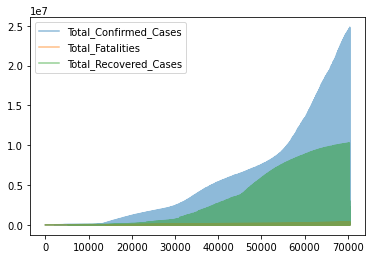

In [124]:
# Plot using pandas
df[["Date", "Total_Confirmed_Cases", "Total_Fatalities", "Total_Recovered_Cases"]].plot(alpha=.5)

### Seaborn

Seaborn as a third-party module that allows for simple plots which integrates well with data frames from `pandas`.

A seaborn theme can be set using `seaborn.set()` which updates the theme of seaborn and matplotlib plots and are generally more appealing than the default theme.

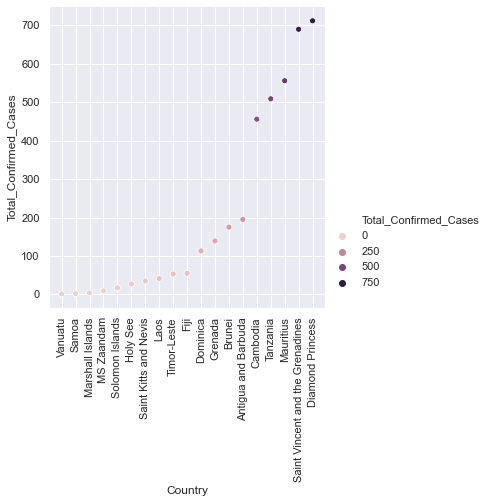

In [172]:
import seaborn as sns

sns.set()

max_df = df.groupby("Country_Region").max()
max_df["Country"] = max_df.index
max_df = max_df.sort_values(by="Total_Confirmed_Cases").iloc[1:20]
fig = sns.relplot(data=max_df, x="Country", y="Total_Confirmed_Cases", hue="Total_Confirmed_Cases")
fig.set_xticklabels(rotation=90)